In [1]:
import pandas as pd
import numpy as np
# from dotenv import load_dotenv
from pandas.tseries.offsets import DateOffset
import os
import requests
import datetime
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.requests import CryptoLatestQuoteRequest
from alpaca.data.requests import CryptoTradesRequest
from alpaca.data.timeframe import TimeFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
from numpy.lib import math
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from pathlib import Path
%matplotlib inline

c:\Users\gtkhh\anaconda3\envs\dev\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Retreival/Formatting

In [2]:
# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [3]:
# type(alpaca_api_key)

In [4]:
crypto_client = CryptoHistoricalDataClient()

In [5]:
# Get Data

request_params = CryptoBarsRequest(
    symbol_or_symbols=["BTC/USD"],
    timeframe=TimeFrame.Hour, start='2021-01-01 00:00:00'
)

btc_bars = crypto_client.get_crypto_bars(request_params)

btc_df = btc_bars.df

btc_df

open     high      low    close  \
symbol  timestamp                                                       
BTC/USD 2021-01-01 00:00:00+00:00  28973.0  29073.5  28775.0  29065.0   
        2021-01-01 01:00:00+00:00  29070.0  29481.0  29038.5  29404.5   
        2021-01-01 02:00:00+00:00  29528.0  29528.0  29218.0  29245.0   
        2021-01-01 03:00:00+00:00  29400.5  29400.5  29337.0  29367.5   
        2021-01-01 04:00:00+00:00  29449.0  29449.0  29136.5  29189.5   
...                                    ...      ...      ...      ...   
        2022-10-08 01:00:00+00:00  19573.0  19593.0  19551.0  19592.0   
        2022-10-08 02:00:00+00:00  19592.0  19597.0  19548.0  19564.0   
        2022-10-08 03:00:00+00:00  19565.0  19565.0  19500.0  19504.0   
        2022-10-08 04:00:00+00:00  19504.0  19525.0  19419.0  19440.0   
        2022-10-08 05:00:00+00:00  19441.0  19449.0  19437.0  19449.0   

                                     volume  trade_count          vwap  
symbol  timestamp                                                       
BTC/USD 2021-01-01 00:00:00+00:00    3.4437         72.0  28968.839097  
        2021-01-01 01:00:00+00:00    4.6183         65.0  29359.399487  
        2021-01-01 02:00:00+00:00    4.3423         42.0  29361.540923  
        2021-01-01 03:00:00+00:00    0.3089          3.0  29400.447394  
        2021-01-01 04:00:00+00:00    2.0245         34.0  29302.743369  
...                                     ...          ...           ...  
        2022-10-08 01:00:00+00:00   52.5334        389.0  19581.419948  
        2022-10-08 02:00:00+00:00    0.6644        189.0  19579.694160  
        2022-10-08 03:00:00+00:00   23.3546        282.0  19516.624344  
        2022-10-08 04:00:00+00:00  154.6978        510.0  19457.443565  
        2022-10-08 05:00:00+00:00   16.2415         59.0  19440.224844  

[15464 rows x 7 columns]

In [6]:
# Create dataframe
btc_df = btc_bars.df

btc_df

open     high      low    close  \
symbol  timestamp                                                       
BTC/USD 2021-01-01 00:00:00+00:00  28973.0  29073.5  28775.0  29065.0   
        2021-01-01 01:00:00+00:00  29070.0  29481.0  29038.5  29404.5   
        2021-01-01 02:00:00+00:00  29528.0  29528.0  29218.0  29245.0   
        2021-01-01 03:00:00+00:00  29400.5  29400.5  29337.0  29367.5   
        2021-01-01 04:00:00+00:00  29449.0  29449.0  29136.5  29189.5   
...                                    ...      ...      ...      ...   
        2022-10-08 01:00:00+00:00  19573.0  19593.0  19551.0  19592.0   
        2022-10-08 02:00:00+00:00  19592.0  19597.0  19548.0  19564.0   
        2022-10-08 03:00:00+00:00  19565.0  19565.0  19500.0  19504.0   
        2022-10-08 04:00:00+00:00  19504.0  19525.0  19419.0  19440.0   
        2022-10-08 05:00:00+00:00  19441.0  19449.0  19437.0  19449.0   

                                     volume  trade_count          vwap  
symbol  timestamp                                                       
BTC/USD 2021-01-01 00:00:00+00:00    3.4437         72.0  28968.839097  
        2021-01-01 01:00:00+00:00    4.6183         65.0  29359.399487  
        2021-01-01 02:00:00+00:00    4.3423         42.0  29361.540923  
        2021-01-01 03:00:00+00:00    0.3089          3.0  29400.447394  
        2021-01-01 04:00:00+00:00    2.0245         34.0  29302.743369  
...                                     ...          ...           ...  
        2022-10-08 01:00:00+00:00   52.5334        389.0  19581.419948  
        2022-10-08 02:00:00+00:00    0.6644        189.0  19579.694160  
        2022-10-08 03:00:00+00:00   23.3546        282.0  19516.624344  
        2022-10-08 04:00:00+00:00  154.6978        510.0  19457.443565  
        2022-10-08 05:00:00+00:00   16.2415         59.0  19440.224844  

[15464 rows x 7 columns]

In [7]:
btc_df.dtypes

open           float64
high           float64
low            float64
close          float64
volume         float64
trade_count    float64
vwap           float64
dtype: object

In [8]:
# adjusting the dataframe
btc_df = btc_df.reset_index()
btc_df = btc_df.set_index('timestamp')
btc_df = btc_df.drop(columns=['symbol','vwap'])

btc_df

,open,high,low,close,volume,trade_count
timestamp,,,,,,
2021-01-01 00:00:00+00:00,28973.0,29073.5,28775.0,29065.0,3.4437,72.0
2021-01-01 01:00:00+00:00,29070.0,29481.0,29038.5,29404.5,4.6183,65.0
2021-01-01 02:00:00+00:00,29528.0,29528.0,29218.0,29245.0,4.3423,42.0
2021-01-01 03:00:00+00:00,29400.5,29400.5,29337.0,29367.5,0.3089,3.0
2021-01-01 04:00:00+00:00,29449.0,29449.0,29136.5,29189.5,2.0245,34.0
...,...,...,...,...,...,...
2022-10-08 01:00:00+00:00,19573.0,19593.0,19551.0,19592.0,52.5334,389.0
2022-10-08 02:00:00+00:00,19592.0,19597.0,19548.0,19564.0,0.6644,189.0
2022-10-08 03:00:00+00:00,19565.0,19565.0,19500.0,19504.0,23.3546,282.0


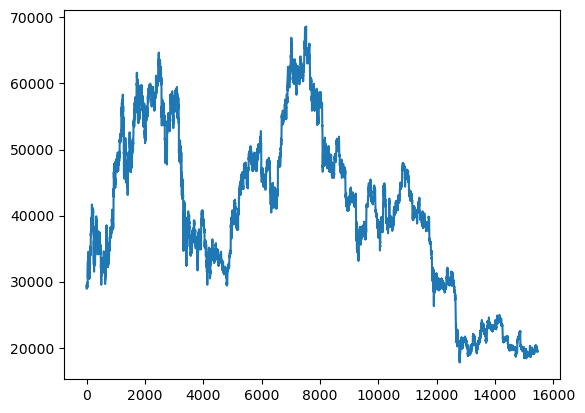

In [9]:
plt.plot(range(len(btc_df)), btc_df[['open']])

### Splitting data into 3D Tensors

In [10]:
# Split test and train data

split_ratio=.7
train_count=int(len(btc_df)*.7)

train=btc_df.iloc[:train_count]
test=btc_df.iloc[train_count:]

In [11]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the features training dataset
train_scaled = scaler.fit_transform(train)

train_scaled

array([[0.00000000e+00, 1.87598489e-04, 2.41180086e-02, 1.08561186e-03,
        2.79123228e-03, 1.28043282e-02],
       [2.44677631e-03, 1.03804497e-02, 3.05961893e-02, 9.65689616e-03,
        3.74333957e-03, 1.15419297e-02],
       [1.39995964e-02, 1.15560669e-02, 3.50092194e-02, 5.63003358e-03,
        3.51961948e-03, 7.39404869e-03],
       ...,
       [4.53359903e-01, 4.49085770e-01, 4.64339275e-01, 4.48963619e-01,
        4.02962832e-02, 4.61677187e-02],
       [4.50383412e-01, 4.47660022e-01, 4.67019053e-01, 4.52094221e-01,
        3.11740968e-02, 2.63300271e-02],
       [4.53259005e-01, 4.50561545e-01, 4.68985864e-01, 4.54492666e-01,
        5.26718136e-02, 2.84941389e-02]])

In [12]:
# Scale test data
test_scaled = scaler.fit_transform(test)

test_scaled

array([[0.96858552, 0.96732634, 0.96873347, 0.97300252, 0.0309445 ,
        0.02274046],
       [0.97262405, 0.97250631, 0.97531068, 0.97114748, 0.02890508,
        0.03422671],
       [0.96934688, 0.96174791, 0.96466816, 0.96591361, 0.00654318,
        0.00997796],
       ...,
       [0.05938628, 0.04851242, 0.06312797, 0.05704253, 0.00646584,
        0.03190625],
       [0.05736701, 0.04718422, 0.06045082, 0.05492249, 0.04295076,
        0.05835944],
       [0.05528154, 0.04466065, 0.06104574, 0.05522062, 0.00448995,
        0.00603318]])

In [13]:
# Set global candles variable
candles=60

# Create X training set
X_train = []

for i in range(len(train_scaled) - candles):
    X_train.append(train_scaled[:,(0,1,2,4,5)][i:i+candles])

X_train = np.array(X_train)
X_train.shape

(10764, 60, 5)

In [14]:
# Create y training set
y_train = []

for i in range(len(train_scaled) - candles):
    y_train.append(train_scaled[:,(3)][i+candles])

y_train = np.array(y_train)
y_train.shape

(10764,)

In [15]:
# Create X test set
X_test = []

for i in range(len(test_scaled) - candles):
    X_test.append(test_scaled[:,(0,1,2,4,5)][i  : i+candles])

X_test = np.array(X_test)
X_test.shape

(4580, 60, 5)

In [16]:
# Create y test set
y_test = []

for i in range(len(test_scaled) - candles):
    y_test.append(test_scaled[:,(3)][i+candles])

y_test = np.array(y_test)
y_test.shape

(4580,)

## Model Creation

In [17]:
# Create the Sequential model instance
regr_nn = Sequential()

# Define the number of neurons in the output layer
number_output_neurons = 1

#Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 64

# Define hidden nodes for all hidden layers
hidden_nodes = 64
display(hidden_nodes)

# Review the number hidden nodes in the first layer
display(hidden_nodes_layer1)

#Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 64

# Review the number hidden nodes in the second layer
display(hidden_nodes_layer2)

64

64

64

In [18]:
# Add the first hidden layer
regr_nn.add(LSTM(units=hidden_nodes_layer1, return_sequences=True, input_shape=(candles,(len(btc_df.columns)-1))))

In [19]:
# # Add dropout layer
regr_nn.add(Dropout(rate=0.2))

In [20]:
#Add the second hidden layer
regr_nn.add(LSTM(units=hidden_nodes, return_sequences=True))


In [21]:
# # Add dropout layer
regr_nn.add(Dropout(rate=0.2))

In [22]:
# #Add the third hidden layer
regr_nn.add(LSTM(units=hidden_nodes))

In [23]:
# # Add dropout layer
# regr_nn.add(Dropout(rate=0.2))

In [24]:
# Add Dense layer
# regr_nn.add(Dense(units=6, activation='relu'))

In [25]:
# Add the output layer to the model specifying the number of output neurons and activation function
regr_nn.add(Dense(units=1,  activation='linear'))


In [26]:
# Display the Sequential model summary, subclassed model requires build
regr_nn.build(X_train.shape)
regr_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            17920     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 84,033
Trainable params: 84,033
Non-traina

In [27]:
# Compile the Sequential model

regr_nn.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
# Fit the model using epochs and the training data
regr_model=regr_nn.fit(X_train, y_train, epochs=20, validation_split=.01)

Epoch 1/20
333/333 [==============================] - 13s 17ms/step - loss: 0.0026 - val_loss: 3.8292e-04
Epoch 2/20
333/333 [==============================] - 4s 13ms/step - loss: 8.8588e-04 - val_loss: 2.5273e-04
Epoch 3/20
333/333 [==============================] - 4s 13ms/step - loss: 7.8028e-04 - val_loss: 4.5336e-04
Epoch 4/20
333/333 [==============================] - 4s 13ms/step - loss: 7.2994e-04 - val_loss: 1.4269e-04
Epoch 5/20
333/333 [==============================] - 4s 13ms/step - loss: 6.3811e-04 - val_loss: 1.3520e-04
Epoch 6/20
333/333 [==============================] - 4s 13ms/step - loss: 5.3515e-04 - val_loss: 2.5176e-04
Epoch 7/20
333/333 [==============================] - 4s 13ms/step - loss: 5.1894e-04 - val_loss: 1.0799e-04
Epoch 8/20
333/333 [==============================] - 5s 14ms/step - loss: 4.6143e-04 - val_loss: 4.3265e-04
Epoch 9/20
333/333 [==============================] - 4s 13ms/step - loss: 4.6717e-04 - val_loss: 1.4615e-04
Epoch 10/20
333/333 [=

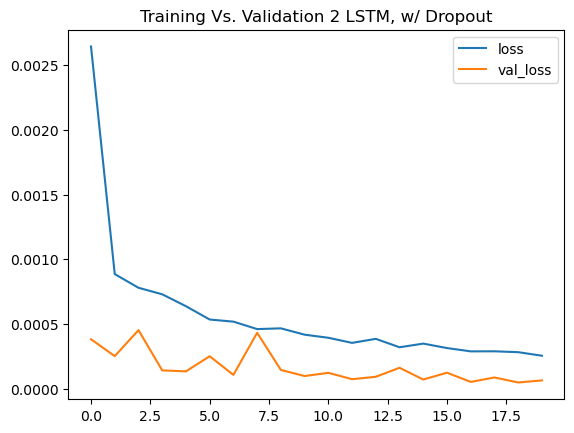

In [29]:
# Train vs test for loss
plt.plot(regr_model.history["loss"])
plt.plot(regr_model.history["val_loss"])
plt.title("Training Vs. Validation 2 LSTM, w/ Dropout")
plt.legend(["loss", "val_loss"])
plt.show()

In [30]:
# Make model predictionis

y_pred=regr_nn.predict(X_test)

y_pred


144/144 [==============================] - 2s 6ms/step


array([[0.946539  ],
       [0.9473816 ],
       [0.95026064],
       ...,
       [0.03513408],
       [0.03450927],
       [0.03239036]], dtype=float32)

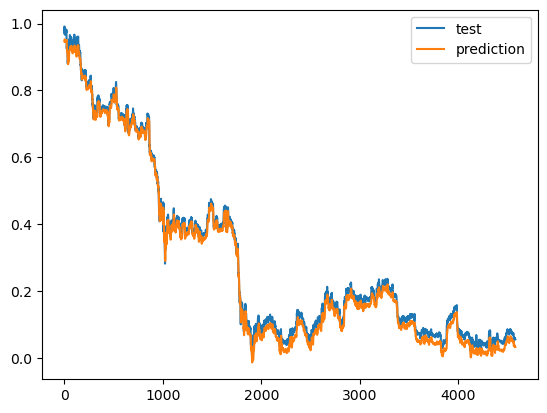

In [31]:
# Plot prediction results
plt.plot(range(len(y_test)), (y_test))
plt.plot(range(len(y_test)), (y_pred))
plt.legend(["test", "prediction"])

In [32]:
# Set the file path for the first regression model
file_path = Path('Models/regr_nn.h5')

# Export your model to a HDF5 file
regr_nn.save(file_path)